## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [16]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [17]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/NVDA_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [18]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [21]:
merged_df = pd.merge(news_df[news_df['stock'] == 'NVDA'], 
                     stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [22]:
print(merged_df.shape)
merged_df.head(5)

(3061, 15)


,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Nvidia Goes Negative (NVDA),https://www.benzinga.com/market-update/11/03/9...,Scott Rubin,2011-03-03 00:00:00+00:00,NVDA,-0.30,2011-03-03 00:00:00+00:00,0.53075,0.53375,0.50600,0.52175,0.478563,1593704000,0.0,0.0
1,Auriga Still Not Sure Where Reality Lies For N...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffB,2011-03-07 00:00:00+00:00,NVDA,-0.25,2011-03-07 00:00:00+00:00,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.0,0.0
2,Goldman Sachs Gives Color On Semiconductors (N...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Staff,2011-03-07 00:00:00+00:00,NVDA,0.00,2011-03-07 00:00:00+00:00,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.0,0.0
3,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,https://www.benzinga.com/analyst-ratings/analy...,Mark Page,2011-03-08 00:00:00+00:00,NVDA,0.00,2011-03-08 00:00:00+00:00,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.0,0.0
4,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",https://www.benzinga.com/analyst-ratings/upgra...,Joe Young,2011-03-08 00:00:00+00:00,NVDA,0.00,2011-03-08 00:00:00+00:00,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [23]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(3061, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [24]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,Nvidia Goes Negative (NVDA),https://www.benzinga.com/market-update/11/03/9...,Scott Rubin,2011-03-03 00:00:00+00:00,NVDA,-0.30,2011-03-03 00:00:00+00:00,0.53075,0.53375,0.50600,0.52175,0.478563,1593704000,0.0,0.0,NaN
1,Auriga Still Not Sure Where Reality Lies For N...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffB,2011-03-07 00:00:00+00:00,NVDA,-0.25,2011-03-07 00:00:00+00:00,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.0,0.0,-0.019166
2,Goldman Sachs Gives Color On Semiconductors (N...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Staff,2011-03-07 00:00:00+00:00,NVDA,0.00,2011-03-07 00:00:00+00:00,0.52275,0.52450,0.49875,0.51175,0.469391,1019140000,0.0,0.0,0.000000
3,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,https://www.benzinga.com/analyst-ratings/analy...,Mark Page,2011-03-08 00:00:00+00:00,NVDA,0.00,2011-03-08 00:00:00+00:00,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.0,0.0,-0.044944
4,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT",https://www.benzinga.com/analyst-ratings/upgra...,Joe Young,2011-03-08 00:00:00+00:00,NVDA,0.00,2011-03-08 00:00:00+00:00,0.51725,0.52000,0.47800,0.48875,0.448295,1947184000,0.0,0.0,0.000000


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [25]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.048216369692975804, p-value: 0.007638160432847857


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [26]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.06108423859841351, p-value: 0.0007227782719344931


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [27]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.05086489763578197, p-value: 0.0006614114537899783


The results show the following correlation values between news sentiment and daily stock return for NVDA:

- **Pearson correlation:** 0.04821 (p-value: 0.00763)
- **Spearman correlation:** 0.06108 (p-value: 0.000722)
- **Kendall correlation:** 0.05086 (p-value: 0.00066)

**Interpretation:**

There is a statistically significant but extremely weak positive association between news sentiment and daily stock returns for NVDA. In practical terms, sentiment scores have almost no meaningful predictive power for daily returns, even though the relationship is statistically detectable due to the large sample size.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

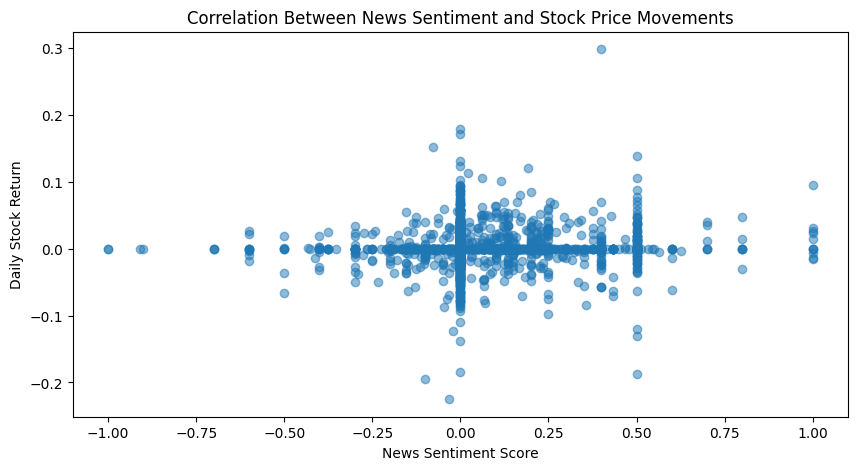

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

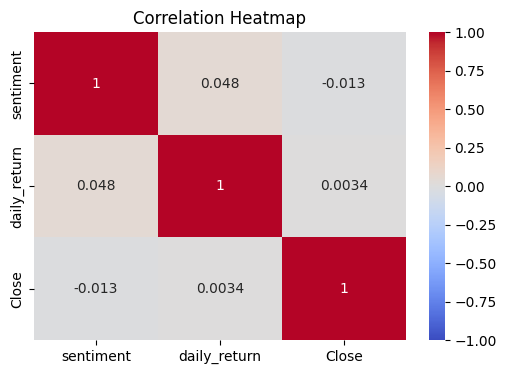

In [31]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()